<a href="https://colab.research.google.com/github/Ray-sunny/Machine_Learning_project/blob/main/Cost_function.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

ur1 = 'https://raw.githubusercontent.com/GrandmaCan/ML/main/Resgression/Salary_Data.csv'
data = pd.read_csv(ur1)
data
# y = ax+b
x = data['YearsExperience']
y = data['Salary']

In [ ]:
!pip install wget
import wget
wget.download('https://github.com/GrandmaCan/ML/raw/main/Resgression/ChineseFont.ttf')

  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9656 sha256=8869547143cd80c84d3f91b0db168c37a21c93f95f8dbce733f98198ebb18864
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget


'ChineseFont.ttf'

In [ ]:
a = 10
b = 0

y_pred = a*x +b
cost = (y - y_pred)**2
cost.sum() / len(x)

602.547878787879

In [ ]:
def compute_cost(x,y,a,b): #計算cost
  y_pred = a*x +b
  cost = (y - y_pred)**2
  cost = cost.sum() / len(x)

  return cost

In [ ]:
compute_cost(x,y,10,10)

227.88121212121214

In [ ]:
# b = 0 a = -100~100 cost = ?

costs = []
for a in range(-100,101):
  cost = compute_cost(x,y,a,0)
  costs.append(cost)

costs


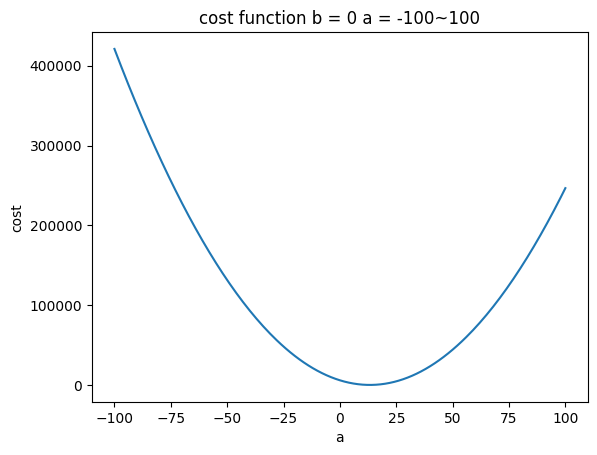

In [ ]:
import matplotlib.pyplot as plt

#plt.scatter(range(-100,101), costs)
plt.plot(range(-100,101), costs)
plt.title('cost function b = 0 a = -100~100')
plt.xlabel('a')
plt.ylabel('cost')
plt.show()

In [ ]:
# b = -100~100 a = -100~100 cost = ?
import numpy as np

ass = np.arange(-100,101)
bs = np.arange(-100,101)
costs = np.zeros((201,201))

i = 0
for a in ass:
  j = 0
  for b in bs:
    cost = compute_cost(x,y,a,b)
    costs[i,j] = cost
    j = j+1
  i = i+1

costs

array([[543097.74787879, 541777.28121212, 540458.81454545, ...,
        320651.34787879, 319726.88121212, 318804.41454545],
       [534727.50939394, 533416.80636364, 532108.10333333, ...,
        314214.30939394, 313299.60636364, 312386.90333333],
       [526422.82181818, 525121.88242424, 523822.9430303 , ...,
        307842.82181818, 306937.88242424, 306034.9430303 ],
       ...,
       [164229.90787879, 164842.64121212, 165457.37454545, ...,
        324557.10787879, 325565.84121212, 326576.57454545],
       [168838.74939394, 169461.24636364, 170085.74333333, ...,
        331099.14939394, 332117.64636364, 333138.14333333],
       [173513.14181818, 174145.40242424, 174779.6630303 , ...,
        337706.74181818, 338735.00242424, 339765.2630303 ]])

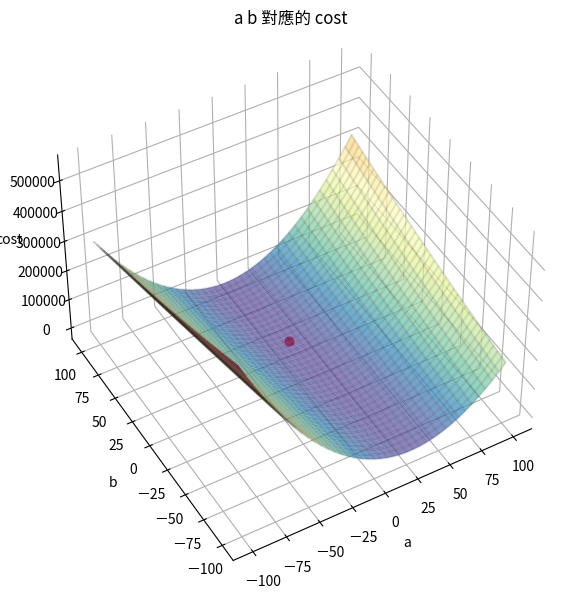

當a = [9], 並且b = [29] 會有最小的costs:[32.69484848]


In [ ]:
import matplotlib as mpl
from matplotlib.font_manager import fontManager

fontManager.addfont('ChineseFont.ttf')
mpl.rc('font', family = 'ChineseFont')

plt.figure(figsize = (7,7)) #把圖變大一點 寬度&高度
ax = plt.axes(projection = '3d')
ax.view_init(45,-120) # 讓圖選轉 第一個參數是上下旋轉角度 第二個參數是左右選轉角度
ax.xaxis.set_pane_color((1,1,1)) #改網格顏色
ax.yaxis.set_pane_color((1,1,1))
ax.zaxis.set_pane_color((1,1,1))


b_grid, a_grid = np.meshgrid(bs, ass) # 先把ba and ass的一維矩陣 轉化為二維網格
ax.plot_surface(a_grid, b_grid, costs, cmap = 'Spectral_r', alpha = 0.7) # 這邊在把二維網格傳入, cmap是改顏色, alhpa是透明度
ax.plot_wireframe(a_grid, b_grid, costs, color = 'black', alpha = 0.1)

ax.set_title('a b 對應的 cost')
ax.set_xlabel('a')
ax.set_ylabel('b')
ax.set_zlabel('cost')

a_index, b_index = np.where(costs == np.min(costs))# 找出cost最低的那個點 且對應到多少a和b值 但回傳的是索引值 並非實際的a,b(因為costs是二維矩陣 所以會回傳兩個值)
ax.scatter(ass[a_index], bs[b_index], costs[a_index, b_index], color = 'red', s = 40) #把最小cost的那個點畫出來


plt.show()
print(f'當a = {ass[a_index]}, 並且b = {bs[b_index]} 會有最小的costs:{costs[a_index, b_index]}') #再從a,b矩陣中 去找出相對應的值